## Установка необходимых пакетов и импорт библиотек

In [1]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib==3.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=81701ca00a7b5b70a99589d282722d21aa81c6eefe9e95ab86b06721da948af9
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp31

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
import os

## Загружаем файлы

In [3]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
  os.system(f"wget -c -nv 'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz' -O '{ab}.txt.gz'")
  os.system(f"gzip -f -d {ab}.txt.gz")

## Объединяем все файлы в один

In [21]:
counts = None
for _, ab in tqdm(gsm_list):
  if counts is not None:
    counts = pd.concat([counts, pd.read_csv(f'{ab}.txt', sep='\t')], axis=1)
  else:
    counts = pd.read_csv(f'{ab}.txt', sep='\t')

counts.to_csv('combined_scRNA_seq_data.csv')
counts

  0%|          | 0/21 [00:00<?, ?it/s]

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Экспрессия маркерных генов

In [23]:
# choose only cells from the provided file
!gdown --id 1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G
cells = pd.read_csv("thymus_epithel_clusts.txt", sep='\t', index_col=0)
cell_ids = cells.index
counts = counts.loc[:, counts.columns.isin(cell_ids)]
counts

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G
To: /content/thymus_epithel_clusts.txt
100% 42.8k/42.8k [00:00<00:00, 44.4MB/s]


,W291665,W291666,W291668,W291670,W291676,W291677,W291679,W291680,W291683,W291685,...,W431994,W431996,W432001,W432003,W432005,W432006,W432008,W432009,W432011,W432013
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
0610007P08Rik,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

In [9]:
!wget http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M1/gencode.vM1.annotation.gtf.gz

--2024-12-10 21:08:15--  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M1/gencode.vM1.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20822164 (20M) [application/x-gzip]
Saving to: ‘gencode.vM1.annotation.gtf.gz’

gencode.vM1.annotat 100%[===================>]  19.86M   734KB/s    in 28s     

2024-12-10 21:08:43 (721 KB/s) - ‘gencode.vM1.annotation.gtf.gz’ saved [20822164/20822164]



In [10]:
!gzip -d gencode.vM1.annotation.gtf.gz

In [11]:
# Load GTF file
gtf = pd.read_csv('gencode.vM1.annotation.gtf', sep='\t', comment='#', header=None,
                  names=['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])

# Filter for exons
exons = gtf[gtf['feature'] == 'exon']

# Extract gene ID and gene name
exons['gene_id'] = exons['attribute'].str.extract('gene_id "([^"]+)"')
exons['gene_name'] = exons['attribute'].str.extract('gene_name "([^"]+)"')

# Filter for the genes of interest
exons_of_interest = exons[exons['gene_name'].isin(markers)]

# Calculate exon lengths
exons_of_interest['exon_length'] = exons_of_interest['end'] - exons_of_interest['start'] + 1

# Drop duplicates to get unique exonic regions
unique_exons = exons_of_interest.drop_duplicates(subset=['gene_id', 'start', 'end'])

# Sum exon lengths for each gene
gene_lengths = unique_exons.groupby('gene_name')['exon_length'].sum()

# Convert to a dictionary
gene_length_dict = gene_lengths.to_dict()


<ipython-input-11-e00f69773766>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exons['gene_id'] = exons['attribute'].str.extract('gene_id "([^"]+)"')
<ipython-input-11-e00f69773766>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exons['gene_name'] = exons['attribute'].str.extract('gene_name "([^"]+)"')
<ipython-input-11-e00f69773766>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [12]:
# Display the results
print(gene_length_dict)

{'Aire': 6427, 'Apoe': 5592, 'Ascl1': 2481, 'Avil': 4127, 'Car8': 3848, 'Ccl20': 2099, 'Ccl21a': 870, 'Ccl21c': 868, 'Cd52': 1400, 'Ctsl': 1975, 'Gnb3': 3986, 'Hdc': 7503, 'Lcn2': 4302, 'Lrmp': 6278, 'Ly6a': 819, 'Ly6d': 691, 'Pigr': 4485, 'Prss16': 3757, 'Psmb11': 4247, 'Serpinb6a': 8733, 'Sox4': 6976, 'Trpm5': 10012, 'Ubd': 931}


In [33]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).

# TPM adjusts for sequencing depth and gene length, making the expression data more comparable across cells
# TPM is also better for comparing relative proportions of reads across different samples (cells)
# Calculate TPM
# Convert gene lengths to kilobases
gene_lengths_kb = {gene: length / 1000 for gene, length in gene_length_dict.items()}

# Convert gene lengths to Series for easy indexing
gene_lengths_series = pd.Series(gene_lengths_kb)

# Calculate RPK (Reads Per Kilobase)
# Divide each gene's counts by its length in kilobases
rpk = counts.div(gene_lengths_series, axis='index')

# Calculate the scaling factor (sum of RPK values / 1,000,000) for each cell
scaling_factor = rpk.sum(axis=0) / 1e6
scaling_factor = pd.Series(scaling_factor.values, index=rpk.columns)

# Calculate TPM (RPK / scaling factor for each cell)
tpm = rpk.divide(scaling_factor, axis='columns')
# 'tpm' now contains the TPM normalized values for the selected genes across the cells

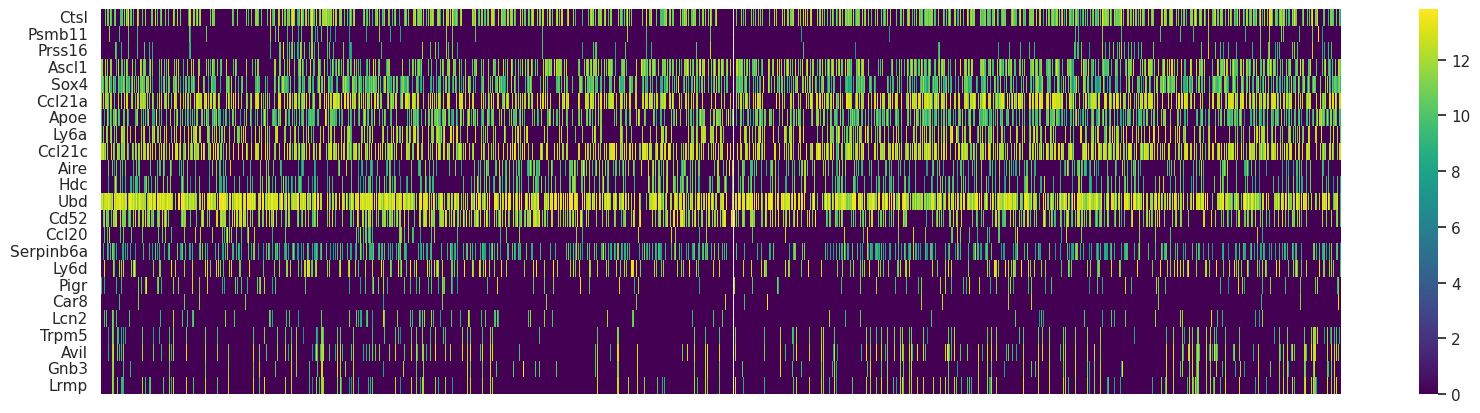

In [34]:
data_normalized_markers = tpm.loc[markers]
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(data_normalized_markers + 1), yticklabels=True, xticklabels=False, cmap='viridis')
plt.show()

## Визуализируем все 2341 клетки на UMAP и PCA

In [41]:
# counts_norm - normalized data
data_normalized = counts / counts.sum() * 10**6
counts_norm = data_normalized
adata = ad.AnnData(counts_norm.T)
sc.pp.log1p(adata)
adata.var_names = list(counts_norm.index)
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

In [42]:
# add to metadata cell type provided by authors
cells_type_data = cells.loc[data_normalized.columns, "group"]

In [43]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = list(cells_type_data)

In [44]:
sc.pp.pca(adata, n_comps=50)

In [45]:
import matplotlib as mpl

In [47]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

<ipython-input-47-06ed9cd57294>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(ListedColormap(colors))


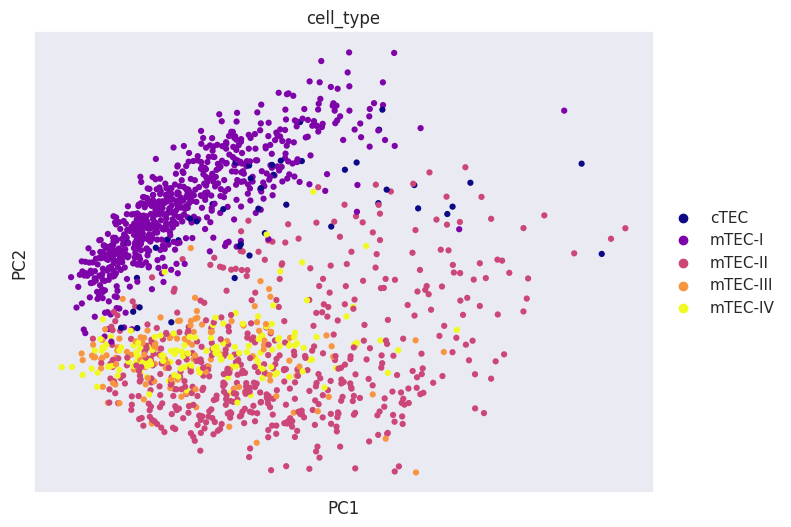

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax, palette="plasma")

In [49]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

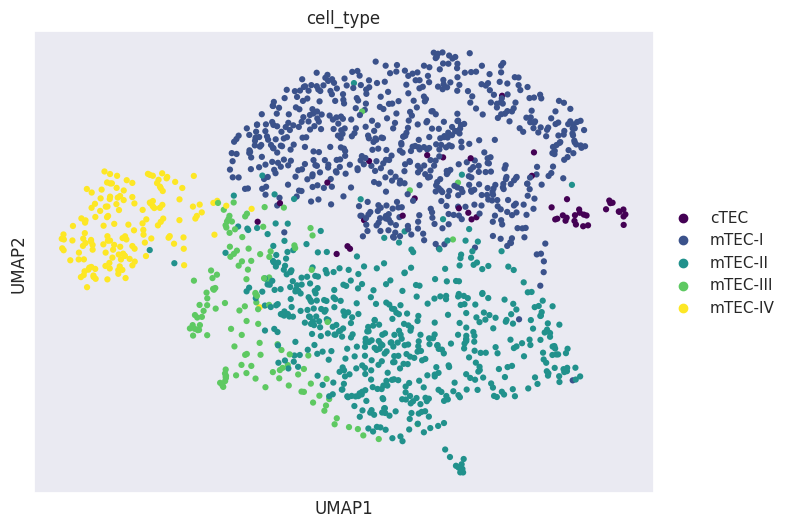

In [50]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax, palette = 'viridis')
plt.show()

## Бонусная часть

In [45]:
! gdown 1jDnstauvQvZsm_89saoUKTVykSicZPc2
SRR2038194 = pd.read_csv("SRR2038194.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)
! gdown 1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
SRR2038195 = pd.read_csv("SRR2038195.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1jDnstauvQvZsm_89saoUKTVykSicZPc2
To: /content/SRR2038194.gene_name.counts
100% 585k/585k [00:00<00:00, 54.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
To: /content/SRR2038195.gene_name.counts
100% 590k/590k [00:00<00:00, 112MB/s]


In [46]:
#Провести нормализацию bulk RNA-seq данных
SRR2038194_normalized = SRR2038194 / SRR2038194.sum() * 10**6
SRR2038195_normalized = SRR2038195 / SRR2038195.sum() * 10**6

In [50]:
#Для каждого гена берем среднее значение TPM по двум репликам bulk RNA-seq
mean_bulk_normalized = pd.concat([SRR2038194_normalized, SRR2038195_normalized], axis=1).mean(axis=1)

In [52]:
#Для каждого гена берем среднее значение TPM по всем клеткам scRNA-seq (подгруппа  mTEC-IV)
mark = list(set(cells.loc[cells['group'] == 'mTEC-IV'].index) & set(data_normalized.columns))
mean_scRNAseq_normalized = data_normalized[mark].mean(axis=1)

In [53]:
#Ccl21c нет в bulk, убрали из маркеров
markers_comp = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

In [55]:
#Подготовить подвыборку генов для анализа
common_genes = list(set(mean_bulk_normalized.index) & set(mean_scRNAseq_normalized.index))
mean_normalized = pd.DataFrame(
    data = {
        'Bulk': mean_bulk_normalized.loc[common_genes],
        'Single-cell': mean_scRNAseq_normalized.loc[common_genes]
    }
)

<Axes: xlabel='Bulk', ylabel='Single-cell'>

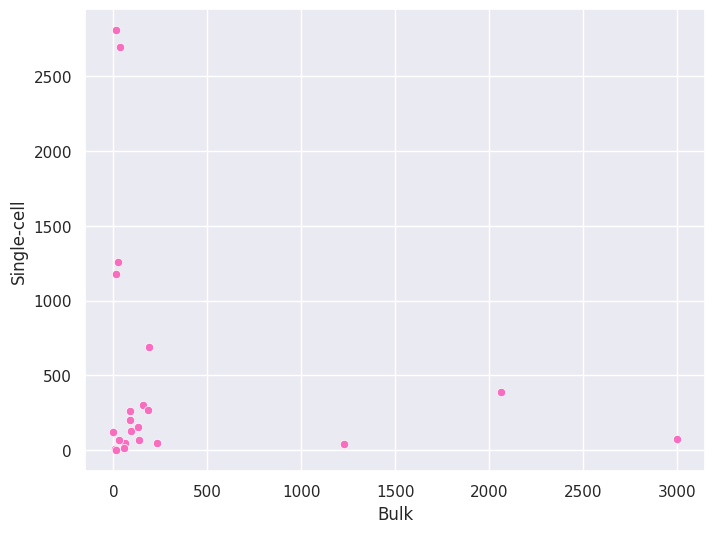

In [60]:
#Можно взять все маркерные гены из основной части задания
#Для выбранного набора генов рисуем график с точками, где каждая точка это 1 ген, координаты -- это средняя экспрессия гена в bulk (ось OX) и средняя экспрессия в mTEC-IV (ось OY)
f, ax = plt.subplots(figsize=(8, 6))
scatter_data = mean_normalized.loc[markers_comp]
sns.scatterplot(data=scatter_data, x="Bulk", y="Single-cell", ax=ax, color="#F76EBF")

In [61]:
#100-200 наиболее высоко-экспрессированных генов как в bulk, так и scRNA
mean_normalized['mean'] = mean_normalized[['Bulk', 'Single-cell']].mean(axis=1)
mean_normalized.sort_values('mean', ascending=False, inplace=True)
mean_normalized_max_mean = mean_normalized.head(100)
genes_max_mean = list(mean_normalized_max_mean.index)

<Axes: xlabel='Bulk', ylabel='Single-cell'>

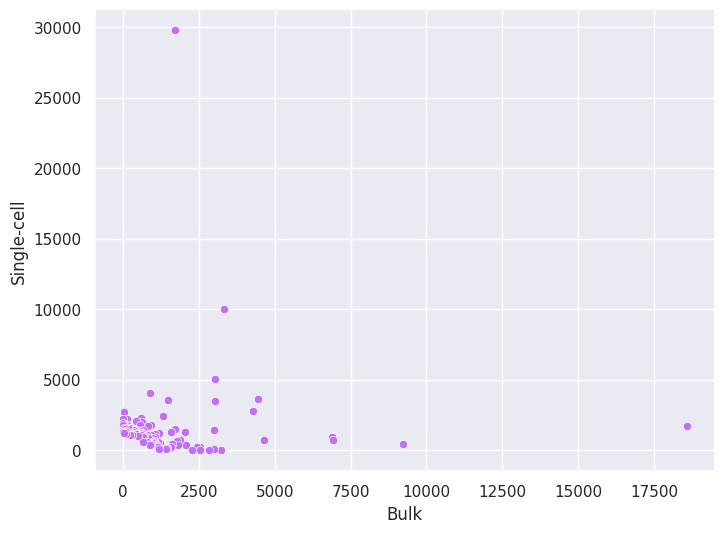

In [63]:
#Для выбранного набора генов рисуем график с точками, где каждая точка это 1 ген, координаты -- это средняя экспрессия гена в bulk (ось OX) и средняя экспрессия в mTEC-IV (ось OY)
f, ax = plt.subplots(figsize=(8, 6))
scatter_data = mean_normalized.loc[genes_max_mean]
sns.scatterplot(data=scatter_data, x="Bulk", y="Single-cell", ax=ax, color="#C26EF7")